<a href="https://colab.research.google.com/github/SSS-BBB/NN_Learn/blob/main/NN_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NN learn on random value**

In [498]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [499]:
from IPython.display import clear_output

## Create random data

In [500]:
DATA_AMOUNT = 50

In [501]:
index = torch.arange(0, DATA_AMOUNT, 1)
index.shape

torch.Size([50])

In [502]:
index

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [503]:
low_y = 0
high_y = 100
y = (high_y - low_y) * np.random.rand(DATA_AMOUNT) + low_y
y.shape

(50,)

## Plot random data

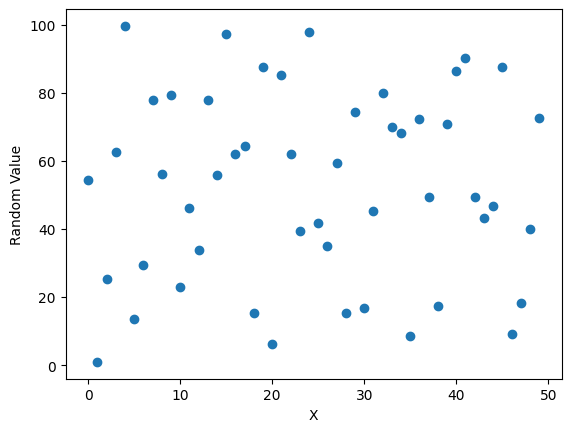

In [504]:
plt.scatter(index, y)
plt.xlabel("X")
plt.ylabel("Random Value")
plt.show()

## NN Module

In [505]:
class NNModel(nn.Module):
  def __init__(self, in_features, hidden_node_list):

    super().__init__()

    # Input layer
    self.inp = nn.Linear(in_features, hidden_node_list[0])

    # Hidden layers
    self.hidden_list = nn.ModuleList()
    for i in range(len(hidden_node_list) - 1):
      self.hidden_list.append(nn.Linear(hidden_node_list[i], hidden_node_list[i + 1]))

    # Output layer
    self.out = nn.Linear(hidden_node_list[-1], 1)

  def forward(self, X):

    X = X.float()

    # Input
    X = F.relu(self.inp(X))

    # Hidden
    for h_layer in self.hidden_list:
      X = F.relu(h_layer(X))

    # Output
    X = self.out(X)

    return X

In [506]:
# Random Hidden layers
hidden_layers = np.random.randint(low=1, high=15, size=5)
hidden_layers = np.asarray(hidden_layers)

In [507]:
hidden_layers

array([ 7,  1, 13,  4,  5])

In [508]:
model = NNModel(DATA_AMOUNT, [7, 5, 4, 7])

## Loss Function And Optimizer



In [509]:
loss_f = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

## Convert numpy to tensor

In [510]:
y = torch.from_numpy(y)

In [511]:
y

tensor([54.2654,  0.9565, 25.2887, 62.5460, 99.6175, 13.5239, 29.4187, 77.9850,
        56.2272, 79.2938, 22.9885, 46.2849, 33.7873, 77.7535, 55.6980, 97.1608,
        62.0065, 64.4213, 15.3043, 87.6517,  6.2623, 85.2301, 62.0109, 39.4714,
        97.8492, 41.6922, 35.0817, 59.3753, 15.4375, 74.4461, 16.7119, 45.1673,
        79.9624, 69.9668, 68.0717,  8.4875, 72.2819, 49.3573, 17.2329, 70.8380,
        86.3916, 90.1052, 49.3995, 43.3629, 46.8639, 87.6294,  9.2841, 18.3229,
        40.1265, 72.4648], dtype=torch.float64)

In [512]:
# Reshaping
y = torch.reshape(y, (-1, 1))
y.shape

torch.Size([50, 1])

In [513]:
y = y.float()
y.dtype

torch.float32

## One Hot Encoding

In [514]:
X = F.one_hot(index, num_classes=DATA_AMOUNT)

In [515]:
X

tensor([[1, 0, 0,  ..., 0, 0, 0],
        [0, 1, 0,  ..., 0, 0, 0],
        [0, 0, 1,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 1, 0, 0],
        [0, 0, 0,  ..., 0, 1, 0],
        [0, 0, 0,  ..., 0, 0, 1]])

## Training!!!

Epoch: 999
Loss: 0.44443240761756897


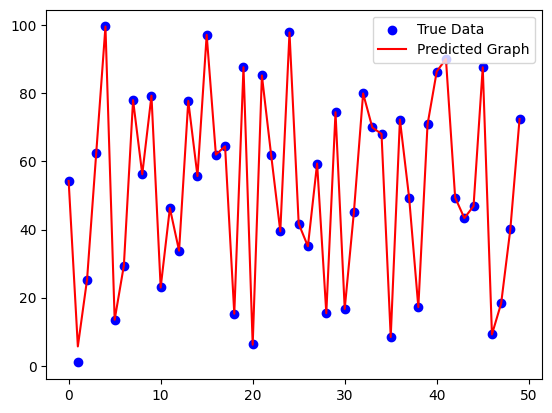

Training took: 2.5024465521176658 minutes.


In [516]:
import time
start_time = time.time()

# Hyper parameter
epochs = 1000
show_every_epochs = 2 # Show info every n epochs

# Tracking variables
losses = []

# Train loop
for ep in range(epochs):

  # Predict
  y_pred = model(X)

  # Loss
  loss = loss_f(y_pred, y)
  losses.append(loss.item())

  # Back Propagation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Print every n epochs
  if (ep + 1) % show_every_epochs == 0 or ep == 0:

    clear_output(wait=True)

    # Print info
    print(f"Epoch: {ep}")
    print(f"Loss: {loss.item()}")

    # Plot graph

    # True
    plt.scatter(index, y, color="b", label="True Data")

    # Predicted
    plt.plot(y_pred.detach(), color="r", label="Predicted Graph")

    plt.legend()
    plt.show()


# Calculate training time
current_time = time.time()
total = current_time - start_time
print(f"Training took: {total/60} minutes.")

## Final Result

Text(0, 0.5, 'Loss')

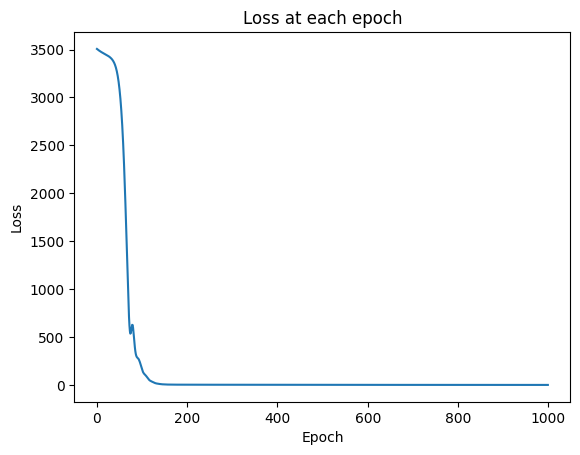

In [517]:
# Loss Graph
plt.plot(losses)
plt.title("Loss at each epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")

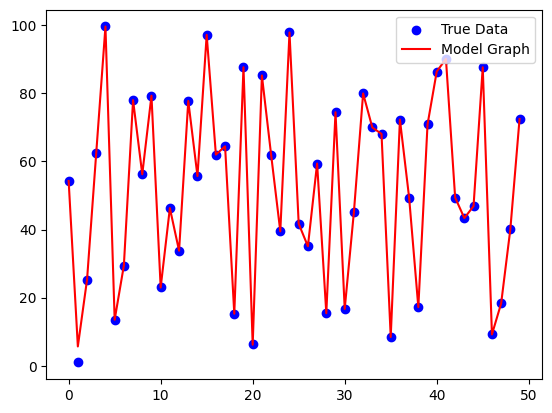

In [518]:
# Final Result Graph
with torch.no_grad():
  y_val = model(X)

  # True
  plt.scatter(index, y, color="b", label="True Data")

  # Predicted
  plt.plot(y_val, color="r", label="Model Graph")

  plt.legend()
  plt.show()